In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os

# Main

In [24]:
path = '/home/dazai/Documents/Data challenge/Data'
data = pd.read_csv(f"{path}/2021-07/2021-07-metropolitan-street.csv")
print(len(data))
data.head(25)

94605


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,485cbbda9ccedfec9386031ee07d269fd41af1d0c4e54b...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.328504,50.836656,On or near Boundstone Close,E01031355,Adur 003D,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1,6e41f7abcd07264824a2330fba6fe5a047cf57a9532196...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.543188,50.813202,On or near Arundel Road,E01031454,Arun 011C,Violence and sexual offences,Under investigation,NaN
2,d9de389476abbc234f347a603d1f79ae88e2a94a4c86e9...,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.862312,51.138136,On or near Barn Platt,E01024029,Ashford 005E,Violence and sexual offences,Under investigation,NaN
3,f9d1abfb8eeb90d3a8e37ff48ed00edce91a33529bbd40...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.838133,51.830231,On or near Aston Close,E01017707,Aylesbury Vale 012C,Violence and sexual offences,Under investigation,NaN
4,20fe88d01cbed59d71bcbb0c4787708b27993407f61c39...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.833412,51.825905,On or near Hanover Close,E01017708,Aylesbury Vale 012D,Violence and sexual offences,Investigation complete; no suspect identified,NaN
5,da3833cff947f1f7bee6b049f917917cef988c55eb505a...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.788675,51.816749,On or near Barnsbury Avenue,E01017698,Aylesbury Vale 014B,Violence and sexual offences,Under investigation,NaN
6,93a3d979d054b2f686ce1932adf8b0973bff81c065a724...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.720453,51.801100,On or near Yorke Close,E01017627,Aylesbury Vale 021A,Other crime,Investigation complete; no suspect identified,NaN
7,NaN,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
8,NaN,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
9,NaN,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [25]:
data.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [26]:
data['Crime type'].value_counts()

Anti-social behaviour           26214
Violence and sexual offences    22626
Other theft                      8283
Vehicle crime                    7729
Public order                     5962
Criminal damage and arson        4698
Burglary                         4262
Drugs                            3291
Theft from the person            3163
Shoplifting                      2976
Bicycle theft                    2196
Robbery                          1877
Other crime                       895
Possession of weapons             433
Name: Crime type, dtype: int64

In [27]:
# lst = ['LSOA code', 'LSOA name', 'Longitude', 'Latitude', 'Reported by', 'Falls within', 'Month']
for i in data.columns:
    # if i not in lst:
    print(f'{i}:{data[i].unique()}\n')

Crime ID:['485cbbda9ccedfec9386031ee07d269fd41af1d0c4e54b45e3edb1f8e7732643'
 '6e41f7abcd07264824a2330fba6fe5a047cf57a9532196f35c9cd0976e7a68a9'
 'd9de389476abbc234f347a603d1f79ae88e2a94a4c86e99e10db8c0548188b15' ...
 '4f632262f175f1e65ad1147e5ada562254a3c31fe8f2fd4e3fa9efee9f2d9110'
 '1bf9e1514a423cde264fd88ed8ad8268bf78e8c820c389f1ba3ead34263b74e0'
 'e57b0b18b3fcf8b5b8c7de155f5fca020967c87af0040678eeb42a960003fd9e']

Month:['2021-07']

Reported by:['Metropolitan Police Service']

Falls within:['Metropolitan Police Service']

Longitude:[-0.328504 -0.543188  0.862312 ... -0.651607 -0.715403       nan]

Latitude:[50.836656 50.813202 51.138136 ... 51.480589 51.624908       nan]

Location:['On or near Boundstone Close' 'On or near Arundel Road'
 'On or near Barn Platt' ... 'On or near Holmlea Walk'
 'On or near Snowden Close' 'No Location']

LSOA code:['E01031355' 'E01031454' 'E01024029' ... 'E01016597' 'E01017900' nan]

LSOA name:['Adur 003D' 'Arun 011C' 'Ashford 005E' ... 'Windsor and M

In [28]:
print(data['Longitude'].describe())
print(data['Latitude'].describe())

count    93642.000000
mean        -0.119549
std          0.163583
min         -5.539455
25%         -0.201545
50%         -0.111461
75%         -0.028215
max          1.312090
Name: Longitude, dtype: float64
count    93642.000000
mean        51.512085
std          0.081012
min         50.120985
25%         51.470963
50%         51.515948
75%         51.555818
max         55.179650
Name: Latitude, dtype: float64


# stop and search

In [29]:
path = 'E:\OneDrive - TU Eindhoven\Year 2\Quartile 3\JBG050 Data challenge 2\Jan_2010_Oct_2021'
data = pd.read_csv(f"{path}/2021-07/2021-07-metropolitan-stop-and-search.csv")
print(len(data))
data.head(25)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\OneDrive - TU Eindhoven\\Year 2\\Quartile 3\\JBG050 Data challenge 2\\Jan_2010_Oct_2021/2021-07/2021-07-metropolitan-stop-and-search.csv'

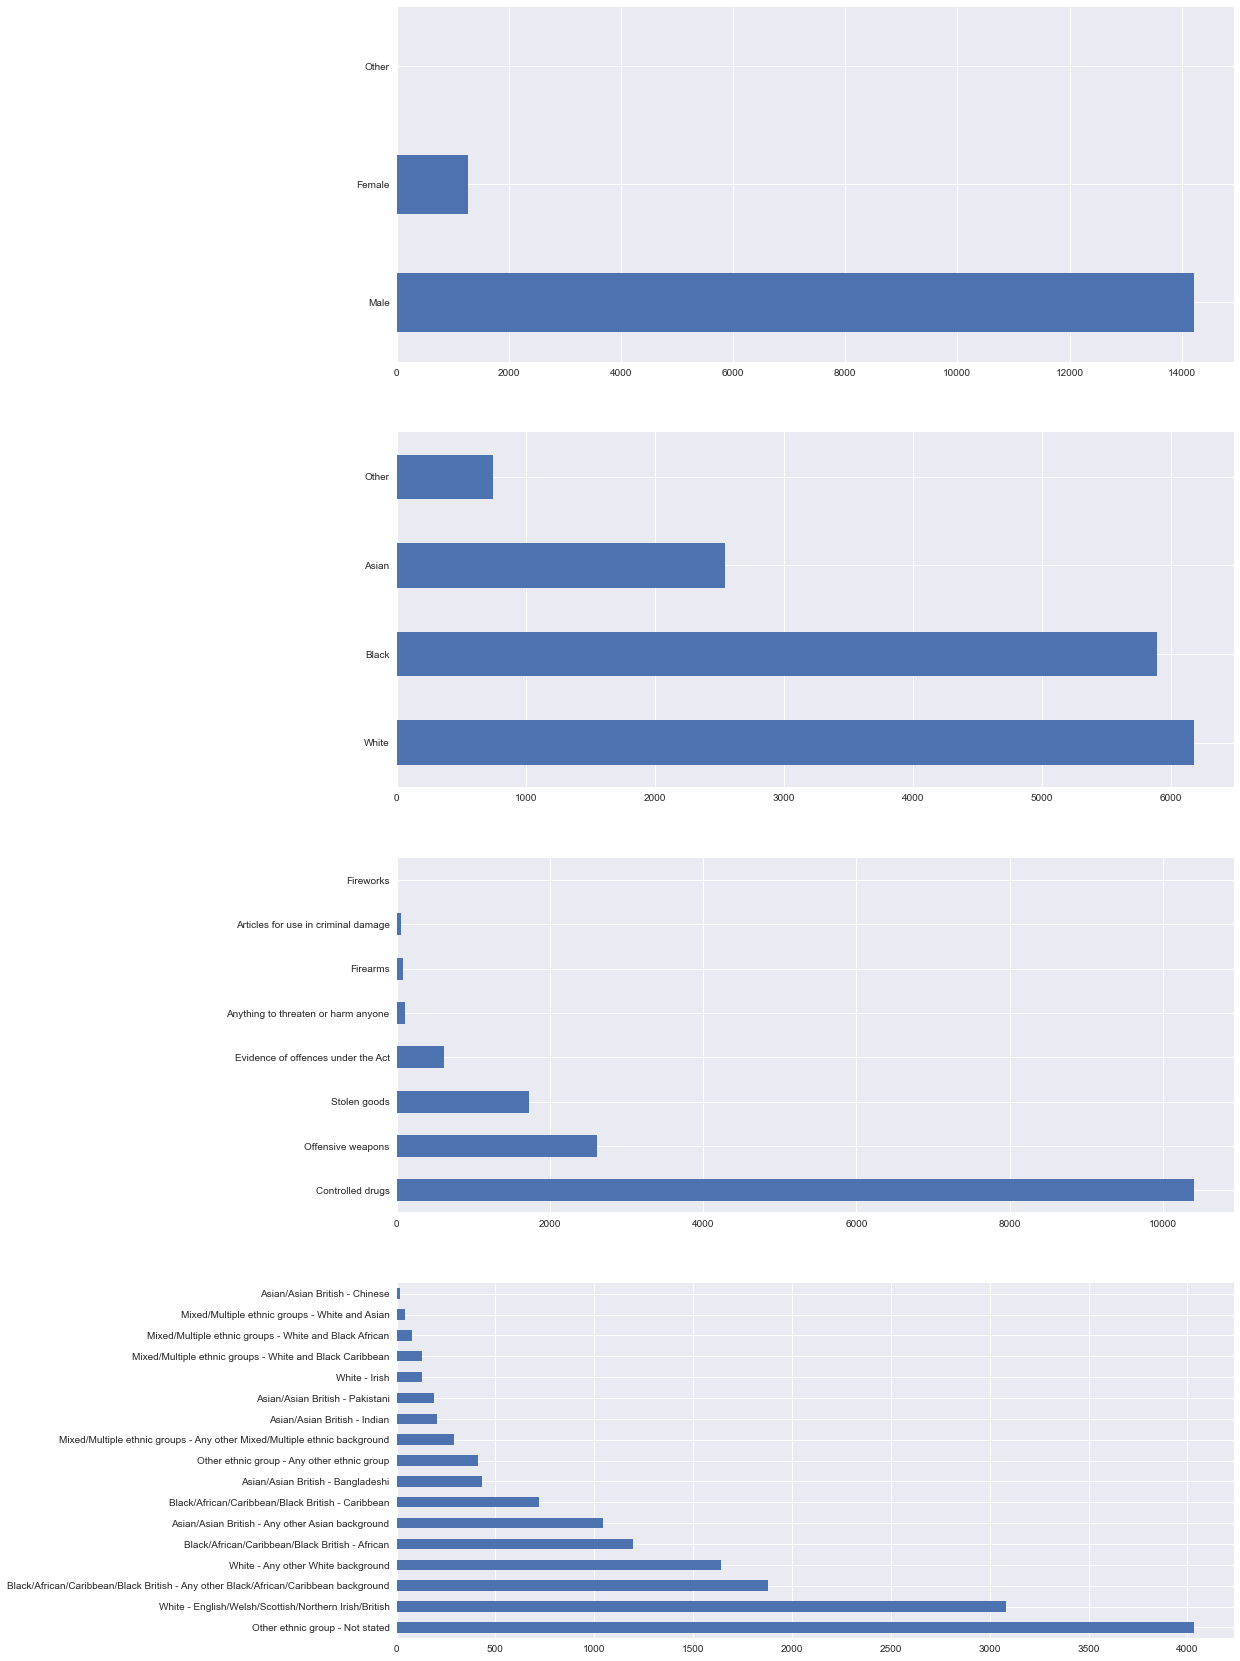

In [ ]:
fig, ax = plt.subplots(4, figsize=(15,30), sharex=False)

data['Gender'].value_counts().plot.barh(ax=ax[0])
data['Officer-defined ethnicity'].value_counts().plot.barh(ax=ax[1])
data['Object of search'].value_counts().plot.barh(ax=ax[2])
data['Self-defined ethnicity'].value_counts().plot.barh(ax=ax[3]);

# Outcomes

In [ ]:
path = 'E:\OneDrive - TU Eindhoven\Year 2\Quartile 3\JBG050 Data challenge 2\Jan_2010_Oct_2021'
data = pd.read_csv(f"{path}/2021-07/2021-07-metropolitan-outcomes.csv")
print(len(data))
data.head(25)

72601


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,c42534bb68d24e7b54c1e3e76a29426769125f7715035f...,2021-07,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
1,427e43167dbb332affa0884af283dd17581d39a69cea69...,2021-07,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
2,f40e425207de455f46b623e4b8941c7001b2eea54b9752...,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.033021,51.486619,On or near FLOYD ROAD,E01001589,Greenwich 012B,Investigation complete; no suspect identified
3,e0b42550231047efe9edb078911eda74e238baf7a942c2...,2021-07,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Local resolution
4,8108cde288ba2e6562e4ccc22df002fa93929bb6014947...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.015975,51.348925,On or near TILFORD AVENUE,E01001056,Croydon 030D,Investigation complete; no suspect identified
5,31df0cc1d1799c1691c6d00c47025943d26771e5b4cfa2...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.075044,51.565069,On or near MARTABAN ROAD,E01001805,Hackney 009B,Investigation complete; no suspect identified
6,1c7a127fd0386efc01c6ff21e5f6d7a55ea17272a91234...,2021-07,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
7,e01a7a4bd955e5b5dbd195c05060551506490cedc8994f...,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.064818,51.550515,On or near ALVERSTONE ROAD,E01003582,Newham 002C,Investigation complete; no suspect identified
8,7eb5e443a80aa19e7ec7ce6fbe1f869a494675d6d6cbf9...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.002028,51.541870,On or near MERIDIAN SQUARE,E01033583,Newham 013G,Investigation complete; no suspect identified
9,b2b90cb69453a3697ce8331137836f7542366ac6ec20c6...,2021-07,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
